# Import thư viện

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [4]:
# Dầu Brent (daily)
df_oil= pd.read_csv(r"C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\data\processed\OIL_processed.csv.csv")           
df_oil.info()
 # USD/VND (daily)
df_usdvnd  = pd.read_csv(r"C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\data\processed\USDVND_processed.csv")    
df_usdvnd.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2719 non-null   object 
 1   oil_price_close  2719 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2816 non-null   object 
 1   usd_vnd_close  2816 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.1+ KB


# Chuẩn hóa sơ bộ

In [5]:
# Danh sách các DataFrame cần xử lý
dataframes = {
    "df_oil": df_oil,
    "df_usdvnd": df_usdvnd
   
}

# Duyệt qua để ép kiểu và lọc dữ liệu
for name, df in dataframes.items():
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df[(df['date'].dt.year >= 2010) & (df['date'].dt.year <= 2024)].copy()
    dataframes[name] = df  

# Gán ngược lại để dùng tiếp
df_oil = dataframes["df_oil"]
df_usdvnd = dataframes["df_usdvnd"]


# Vẽ biểu đồ Line Chart

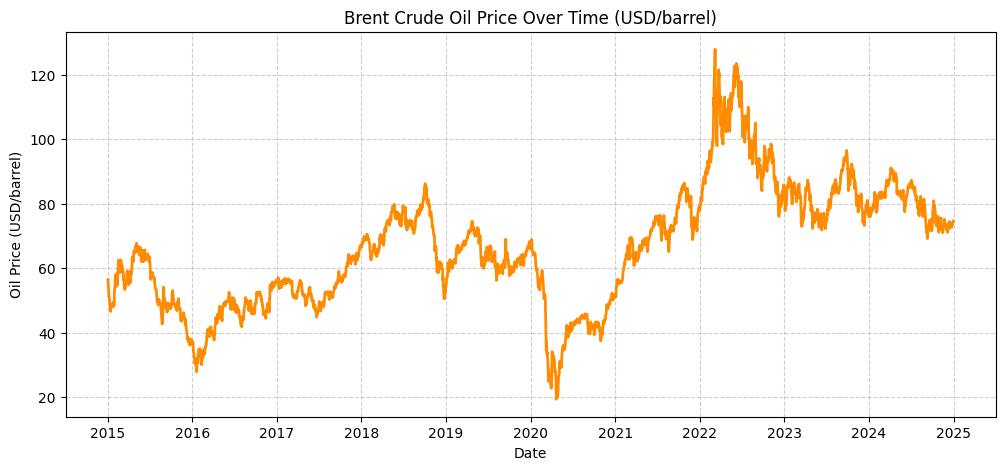

In [7]:
plt.figure(figsize=(12,5))
plt.plot(df_oil['date'], df_oil['oil_price_close'], color='darkorange', linewidth=2)
plt.title('Brent Crude Oil Price Over Time (USD/barrel)')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD/barrel)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

2015–2016: Giá dầu giảm sâu từ khoảng 60 USD xuống ~30 USD/thùng — do dư cung toàn cầu (OPEC tăng sản lượng).

2016–2018: Phục hồi mạnh lên khoảng 80 USD/thùng khi nhu cầu phục hồi.

2020: Sụt giảm cực mạnh về ~20 USD/thùng do COVID-19 khiến nhu cầu năng lượng giảm.

2021–2022: Bùng nổ trở lại, vượt 120 USD/thùng do chiến sự Nga–Ukraine và khủng hoảng năng lượng toàn cầu.

2023–2025: Giảm dần và dao động quanh 70–90 USD/thùng, phản ánh cung cầu ổn định hơn.

Nhận xét:

→ Giá dầu có chu kỳ rõ ràng, bị ảnh hưởng bởi biến động chính trị và nhu cầu toàn cầu.
→ Sau 2022, giá dầu vẫn duy trì ở mức cao hơn giai đoạn trước COVID, cho thấy áp lực chi phí năng lượng còn tồn tại.

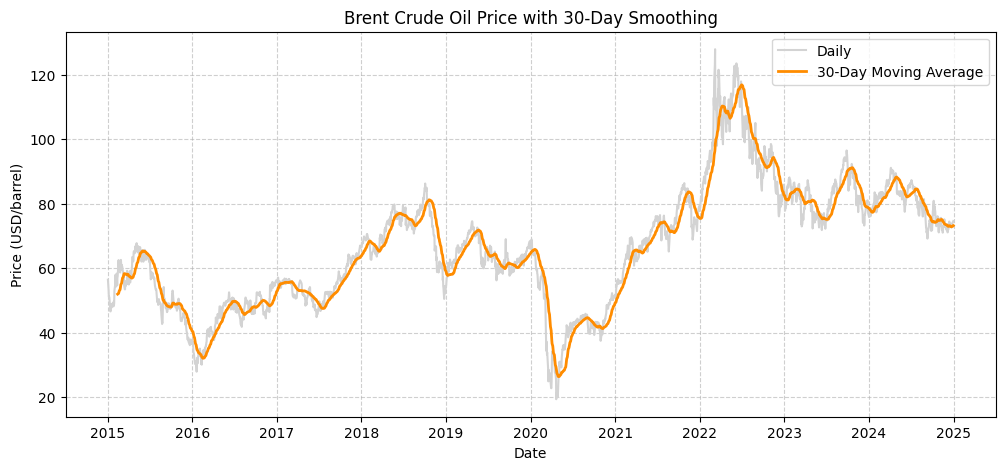

In [10]:
df_oil['oil_smooth'] = df_oil['oil_price_close'].rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(df_oil['date'], df_oil['oil_price_close'], color='lightgray', label='Daily')
plt.plot(df_oil['date'], df_oil['oil_smooth'], color='darkorange', linewidth=2, label='30-Day Moving Average')
plt.title('Brent Crude Oil Price with 30-Day Smoothing')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Các đợt biến động ngắn (tăng – giảm mạnh) được “làm phẳng”, giúp dễ nhận ra chu kỳ tăng – giảm dài hạn.

Xu hướng chính:

2015–2020: Giá dầu có xu hướng tăng dài hạn.

2020: Giảm đột ngột.

2021–2022: Tăng vọt rồi điều chỉnh.

2023–2025: Giảm nhẹ, đi ngang.

Kết luận: Biểu đồ này giúp xác định xu hướng tăng/giảm bền vững, hữu ích khi phân tích kinh tế năng lượng hoặc lạm phát.

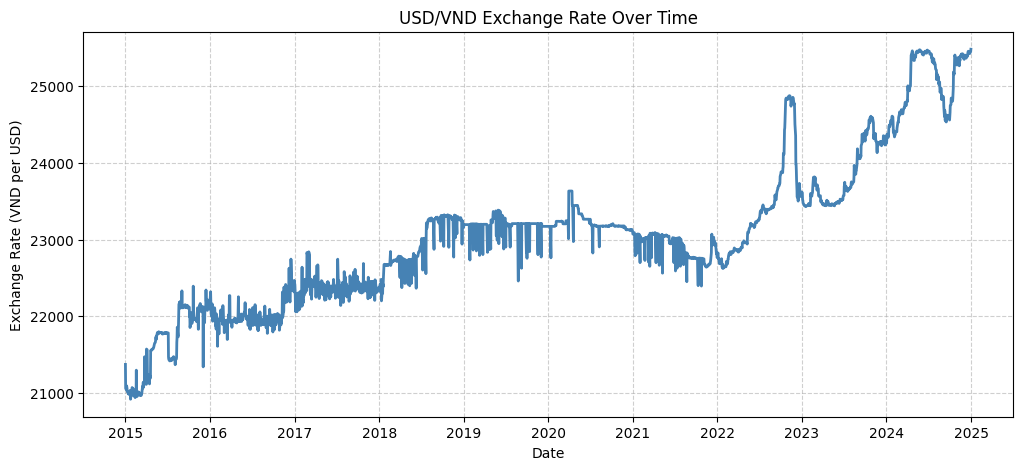

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df_usdvnd['date'], df_usdvnd['usd_vnd_close'], color='steelblue', linewidth=2)
plt.title('USD/VND Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (VND per USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


2015–2019: Tỷ giá tăng chậm từ 21,000 → 23,000 VND/USD, do đồng USD mạnh và Việt Nam nhập khẩu nhiều.

2020: Ổn định trong đại dịch (~23,000).

2022–2023: Tăng vọt lên gần 25,500 VND/USD, do:

Cục Dự trữ Liên bang Mỹ (FED) tăng lãi suất mạnh.

Đồng USD toàn cầu tăng giá.

Áp lực nhập siêu và chi phí năng lượng cao.

2024–2025: Tiếp tục duy trì vùng cao, phản ánh đồng VND suy yếu tương đối.

Nhận xét:
→ Tỷ giá tăng kéo theo chi phí nhập khẩu dầu, nguyên liệu tăng — gây áp lực lên lạm phát.
→ Tuy nhiên, xuất khẩu Việt Nam có thể hưởng lợi nhờ USD mạnh.

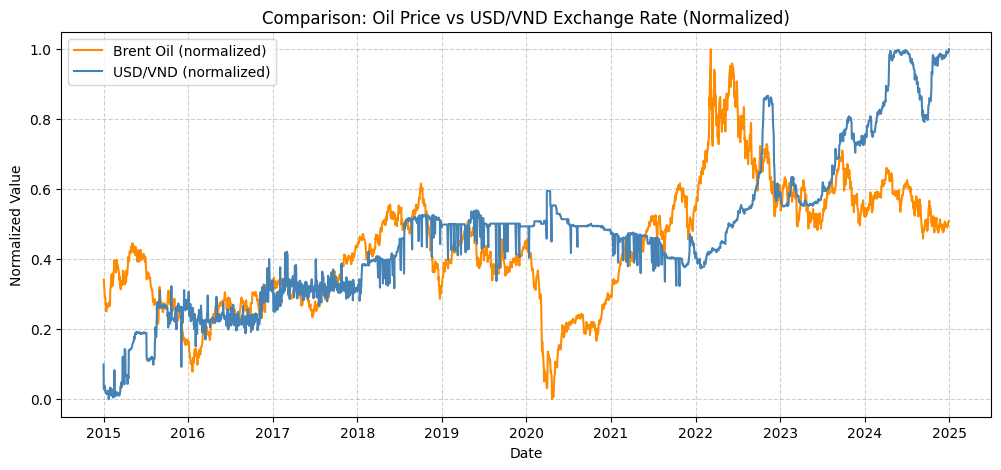

In [15]:
import numpy as np

# Chuẩn hóa về cùng thang điểm (0–1)
df_oil['norm'] = (df_oil['oil_price_close'] - np.min(df_oil['oil_price_close'])) / (np.max(df_oil['oil_price_close']) - np.min(df_oil['oil_price_close']))
df_usdvnd['norm'] = (df_usdvnd['usd_vnd_close'] - np.min(df_usdvnd['usd_vnd_close'])) / (np.max(df_usdvnd['usd_vnd_close']) - np.min(df_usdvnd['usd_vnd_close']))

plt.figure(figsize=(12,5))
plt.plot(df_oil['date'], df_oil['norm'], label='Brent Oil (normalized)', color='darkorange')
plt.plot(df_usdvnd['date'], df_usdvnd['norm'], label='USD/VND (normalized)', color='steelblue')
plt.title('Comparison: Oil Price vs USD/VND Exchange Rate (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


2015–2019: Hai đường có xu hướng tăng cùng chiều nhẹ.

2020: Khi giá dầu giảm mạnh, tỷ giá tạm ổn định → cho thấy Việt Nam không bị sốc tỷ giá lớn trong đại dịch.

2021–2022: Giá dầu tăng mạnh, tỷ giá cũng tăng theo, chứng tỏ chi phí nhập khẩu năng lượng cao làm VND chịu áp lực mất giá.

2023–2025: Cả hai đều dao động quanh mức cao, thể hiện sự ổn định mới nhưng với chi phí cao hơn so với trước COVID.

Kết luận mối quan hệ:

Có mối tương quan dương nhẹ giữa giá dầu và tỷ giá USD/VND — khi dầu tăng, áp lực nhập khẩu và USD mạnh khiến VND giảm giá.

Biểu đồ cũng cho thấy nền kinh tế Việt Nam chịu ảnh hưởng mạnh từ biến động năng lượng toàn cầu.